In [65]:
from skimage import io
from skimage import transform
import skimage
from matplotlib import pyplot as plt
import numpy as np
import os
import glob
import cv2

%matplotlib inline

path1 = '/home/gs/DataScientist/planet'
trainPath = '/train-tif'
testPath = '/test-tif'
targetTrainPath = '/train-tif-64'
targetTestPath = '/test-tif-64'

PIC_SIZE = 64
VERBOSE_INTERVAL = 2500


In [55]:
# definitions

def resizeImage (img):
    #resize
    img2 = skimage.transform.resize(img, (PIC_SIZE, PIC_SIZE), preserve_range=True)
    #img2 = cv2.resize(img.astype('float'), (PIC_SIZE, PIC_SIZE), interpolation=cv2.INTER_LINEAR)
    #img2 = cv2.resize(img, (PIC_SIZE, PIC_SIZE), interpolation=cv2.INTER_CUBIC)
    return (img2)

In [ ]:

# read train images

lines = 0

print('Resize train images')
path = os.path.join(path1+trainPath, '*.tif')
print (path)
files = glob.glob(path)
for fl in files:
    lines += 1
    if lines % VERBOSE_INTERVAL == 0:
        print ('  files read: {}'.format(lines))
    flbase = os.path.basename(fl)
    i1 = io.imread(fl)
    r = resizeImage(i1)
    name = path1+targetTrainPath+'/'+flbase
    io.imsave(name, r)








In [ ]:
# read test images

lines = 0

print('Resize test images')
path = os.path.join(path1+testPath, '*.tif')
print (path)
files = glob.glob(path)
for fl in files:
    lines += 1
    if lines % VERBOSE_INTERVAL == 0:
        print ('  files read: {}'.format(lines))
    flbase = os.path.basename(fl)
    i1 = io.imread(fl)
    r = resizeImage(i1)
    name = path1+targetTestPath+'/'+flbase
    io.imsave(name, r)


In [ ]:
name = 'train_1130.tif'
i1 = io.imread(path1+trainPath+'/'+name) / 65535.
#i1 = cv2.imread(path1+trainPath+'/'+name, cv2.IMREAD_COLOR) 
i2 = resizeImage(i1)
print (i1.shape)
print (i2.shape)
print (np.mean(i1))
print (np.mean(i2))
print (np.mean(i1[:,:,0]))
print (np.mean(i2[:,:,0]))
print (np.mean(i1[:,:,1]))
print (np.mean(i2[:,:,1]))
print (np.mean(i1[:,:,2]))
print (np.mean(i2[:,:,2]))
print (np.mean(i1[:,:,3]))
print (np.mean(i2[:,:,3]))

print (i1[0,0,0])
print (i2[0,0,0])


io.imsave(path1+targetTrainPath+'/'+name, i2)




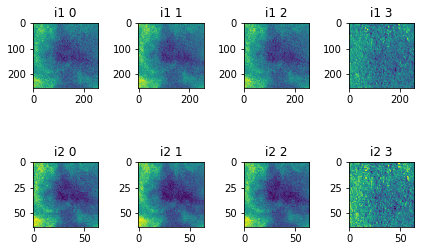

In [69]:

i1 = io.imread(path1+trainPath+'/'+'train_1140.tif')
i2 = io.imread(path1+targetTrainPath+'/'+'train_1140.tif')

fig, axes = plt.subplots(nrows=2, ncols=4)
#                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(i1[:,:,0])
ax[0].set_title("i1 0")
ax[1].imshow(i1[:,:,1])
ax[1].set_title("i1 1")
ax[2].imshow(i1[:,:,2])
ax[2].set_title("i1 2")
ax[3].imshow(i1[:,:,3])
ax[3].set_title("i1 3")
ax[4].imshow(i2[:,:,0])
ax[4].set_title("i2 0")
ax[5].imshow(i2[:,:,1])
ax[5].set_title("i2 1")
ax[6].imshow(i2[:,:,2])
ax[6].set_title("i2 2")
ax[7].imshow(i2[:,:,3])
ax[7].set_title("i2 3")

plt.tight_layout()
plt.show()